<a href="https://colab.research.google.com/github/avyaktawrat/SHALA2020/blob/master/Assignments/Machine_Learning/ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [3]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

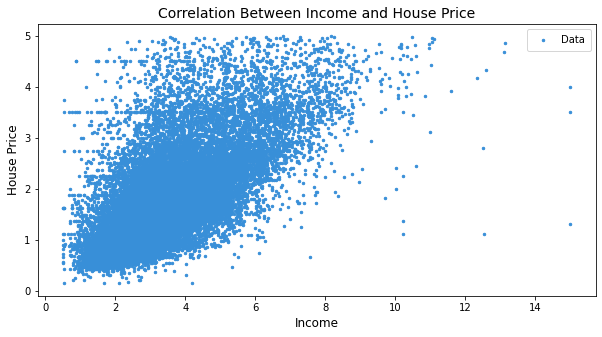

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m, b = 0.1, 0.1 # parameters
  mse = [] 
  N = len(X) # number of samples

  for i in range(epochs):
    for k in range(N-batch_size):
      error = m*X[k: k + batch_size] + b - y[k: k + batch_size]
      m = m - lr * (np.dot(X[k: k + batch_size].transpose(), error)).sum() / batch_size
      b = b - lr * error.sum() / batch_size
    
    mse.append(mean_squared_error(y,m*X + b))

  return m, b, mse

In [0]:
X = X.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [0]:
m, b,  mse = SGD(X, y, lr=0.00001, epochs=300, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

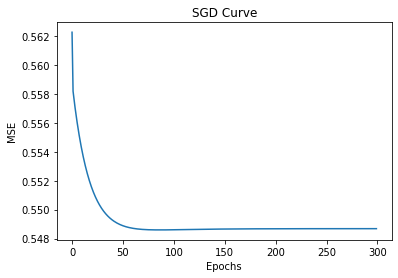

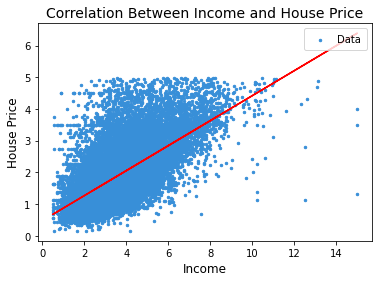

In [11]:
y_pred = m*X + b

plt.plot(mse)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('SGD Curve')
plt.show()

# plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X,y_pred,c='r')
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



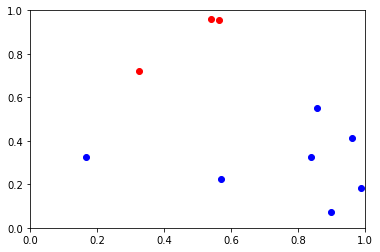

In [35]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    x = np.concatenate((x, np.ones(np.shape(x)[0]).reshape(-1,1)), axis = 1)
    w = np.ones(np.shape(x)[1]).reshape(-1,1)
    loss = []
    # print(w.shape)

    for i in range(epoch):
        # accounting for bias in w
        y_pred = np.dot(x, w).reshape(-1)
        hinge_loss = (np.maximum(np.zeros_like(y_pred), 1 - np.multiply(y,y_pred))).sum()
        loss.append(hinge_loss)
        
        ## update parameters
        # for i in range (np.shape(x)[0]):
        #     if 
        #     np.multiply(y, )
        clipped = np.clip(np.multiply(y,y_pred), a_min= None, a_max=1)
        y_new = np.multiply( np.sign(1-clipped), y)
        # print(y.shape)
        # print(np.dot(x.transpose(),-y).shape )
        w = w - l_rate * np.dot(x.transpose(),-y_new).reshape(-1,1)
        
    return w, loss



---


**Run SVM Classifier**


---



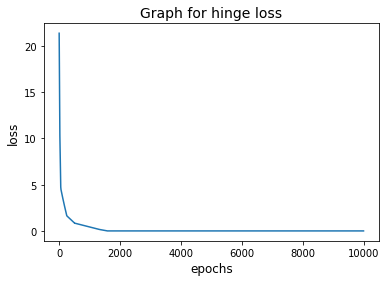

In [38]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w, loss = svm_function(X, Y, 10000, 0.007)

plt.plot(loss)
plt.xlabel('epochs', fontSize=12)
plt.ylabel('loss', fontSize=12)
plt.title('Graph for hinge loss', fontSize=14)
plt.show()

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



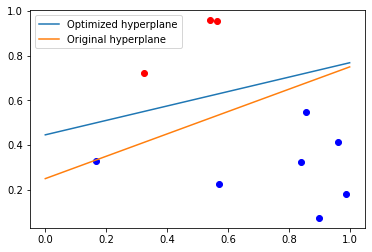

In [39]:
a =-w[0]/w[1]
b = -w[2]/w[1]
xx = np.linspace(0, 1)
yy =  a * xx + b

a1 = 0.5
b1=0.25
yy1 =   a1 * xx + b1

fig = plt.figure()
ax = plt.subplot(111)
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  ax.scatter(x, y, c=clr)
ax.plot(xx,yy,label='Optimized hyperplane')
ax.plot(xx,yy1,label='Original hyperplane')
ax.legend()
plt.show()